The objective is to build a machine learning model to predict whether the applicant's profile is relevant to be granted with loan or not.

The project focuses on Binary Classification.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1	Loan	A unique id

2	Gender	Gender of the applicant Male/female

3	Married	Marital Status of the applicant, values will be Yes/ No

4	Dependents	It tells whether the applicant has any dependents or not.

5	Education	It will tell us whether the applicant is Graduated or not.

6	Self_Employed	This defines that the applicant is self-employed i.e. Yes/ No

7	ApplicantIncome	Applicant income

8	CoapplicantIncome	Co-applicant income

9	LoanAmount	Loan amount (in thousands)

10	Loan_Amount_Term	Terms of loan (in months)

11	Credit_History	Credit history of individual's repayment of their debts

12	Property_Area	Area of property i.e. Rural/Urban/Semi-urban

13	Loan_Status	Status of Loan Approved or not i.e. Y- Yes, N-No


In [146]:
# loading dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/LoanPrediction.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [147]:
data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [148]:
# Loan_ID is unique and not correlated with any of the other column
data = data.drop(['Loan_ID'], axis=1)
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [150]:
# handling missing values
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [151]:
# missing values as percent
data.isnull().mean() * 100

,0
Gender,0.000000
Married,0.000000
Dependents,2.006689
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.511706
Loan_Amount_Term,2.341137
Credit_History,8.193980


Mean - the average value of a dataset

Median - the middle value when data is sorted

Mode - the value that appears most frequently in the dataset

Handling missing values:

- remove the rows if we have less number of missing values
- remove columns if we have more number of missing values
- replace missing values with mean or mode
  /for categorical values use mode/

In [152]:
data.loc[data['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
101,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
118,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
221,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
287,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
295,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
325,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
327,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
338,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
347,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
504,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


In [153]:
data = data.dropna(subset = ['Dependents', 'Loan_Amount_Term'])

In [154]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [155]:
data.iloc[100 : 102]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
106,Male,Yes,2.0,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban,N
107,Male,Yes,3.0,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y


In [156]:
data["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 104., 315., 116.,
       151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144., 184.,
        80.,  47.,  75., 134.,  44., 112., 286.,  97.,  96., 135., 180.,
        99., 165., 258., 126., 312., 136., 172.,  81., 187., 113., 176.,
       130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25., 137.,
       115., 225., 216.,  94., 139., 118., 185., 154.,  85., 259., 194.,
        93., 160., 182., 650., 102., 290.,  84.,  88., 242., 129.,  30.,
       152., 244., 600., 255.,  98., 275., 121.,  63.,  87., 101., 495.,
        67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90., 166.,
       124.,  55.,  59., 127., 214., 240.,  72.,  60.,  42., 280., 140.,
       155., 123., 138., 279., 192., 304., 330., 150., 207., 436.,  78.,
        54.,  89., 132., 480.,  56., 300., 376., 117., 490.,  71., 173.,
        46., 228., 308., 105., 236., 570., 380., 29

In [157]:
data.loc[data["LoanAmount"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
34,Male,Yes,0.0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
62,Male,Yes,1.0,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
80,Male,Yes,1.0,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
94,Male,No,0.0,Graduate,Yes,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,0.0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
111,Female,No,1.0,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
124,Male,No,0.0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
197,Male,Yes,3.0,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
278,Male,Yes,0.0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N


In [158]:
# fill with mean
mean_LoanAmount = np.round(data["LoanAmount"].mean(), decimals = 0)
mean_LoanAmount


np.float64(146.0)

In [159]:
data["LoanAmount"] = data["LoanAmount"].fillna(mean_LoanAmount)

In [160]:
data.iloc[0]

,0
Gender,Male
Married,No
Dependents,0.0
Education,Graduate
Self_Employed,No
ApplicantIncome,5849
CoapplicantIncome,0.0
LoanAmount,146.0
Loan_Amount_Term,360.0
Credit_History,1.0


In [161]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [162]:
# fill with mode
mode_CreaditHistory = data["Credit_History"].mode()
mode_CreaditHistory


,Credit_History
0,1.0


In [163]:
type(mode_CreaditHistory)

pandas.core.series.Series

In [164]:
mode_CreaditHistory[0]

np.float64(1.0)

In [165]:
data["Credit_History"] = data["Credit_History"].fillna(mode_CreaditHistory[0])
data["Credit_History"].isnull().sum()

np.int64(0)

In [166]:
data.Credit_History.unique()

array([1., 0.])

In [167]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [168]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [169]:
data["Dependents"].unique()

array([0., 1., 2., 3.])

In [170]:
# object columns
obj = (data.dtypes == 'object')
obj

,0
Gender,True
Married,True
Dependents,False
Education,True
Self_Employed,True
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,False
Loan_Amount_Term,False
Credit_History,False


In [171]:
obj_cols = list(obj[obj].index)
obj_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Visualize all the unique values in columns using barplot.

This shows which value is dominating.

In [172]:
y = data['Property_Area'].value_counts()
y

,count
Property_Area,
Semiurban,219
Urban,185
Rural,169


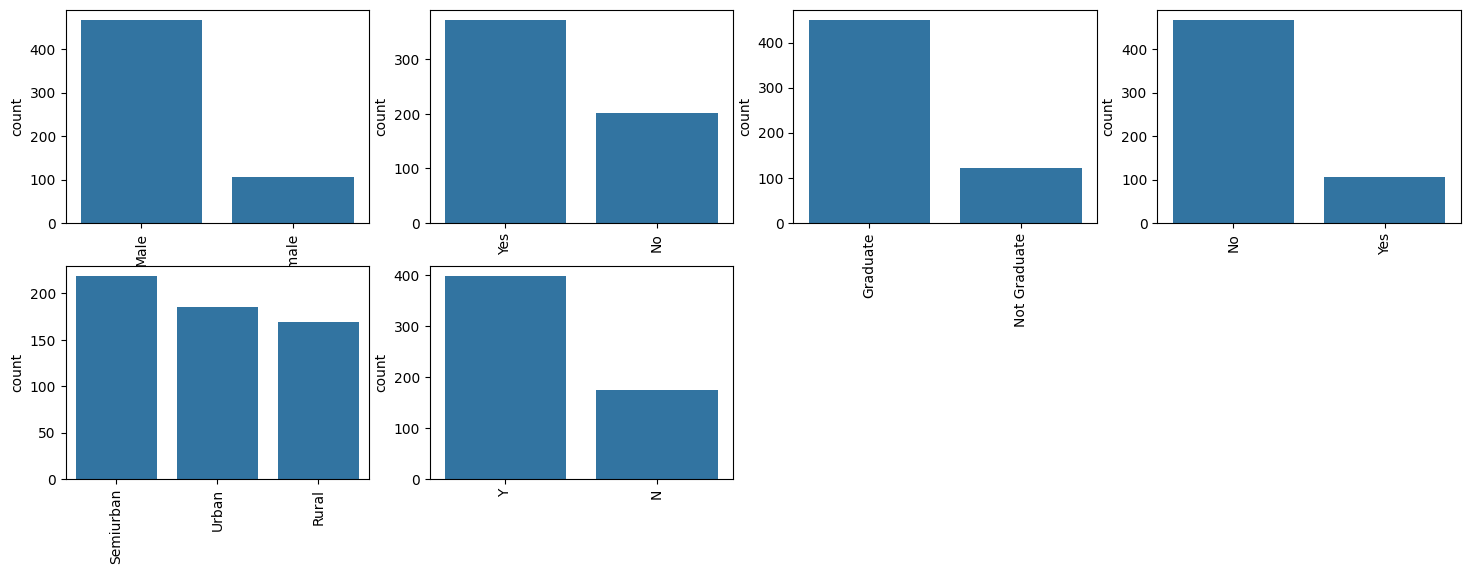

In [173]:
# create figure
plt.figure(figsize=(18,36))

index = 1
for col in obj_cols:
  y = data[col].value_counts()
  plt.subplot(11, 4, index)
  plt.xticks(rotation = 90)
  sns.barplot(x = list(y.index), y=y)
  index += 1

In [174]:
# encoding
''' encoding = {
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    }

    data.replace(encoding, inplace=True)
'''

' encoding = {\n    "Gender": {"Male": 1, "Female": 0},\n    "Married": {"Yes": 1, "No": 0},\n    }\n\n    data.replace(encoding, inplace=True)\n'

In [175]:
# encoding categorical data
# all the categorical values are binary so Label Encoder will change the values into int datatype.
le = LabelEncoder()
data[obj_cols] = data[obj_cols].apply(le.fit_transform)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             573 non-null    int64  
 1   Married            573 non-null    int64  
 2   Dependents         573 non-null    float64
 3   Education          573 non-null    int64  
 4   Self_Employed      573 non-null    int64  
 5   ApplicantIncome    573 non-null    int64  
 6   CoapplicantIncome  573 non-null    float64
 7   LoanAmount         573 non-null    float64
 8   Loan_Amount_Term   573 non-null    float64
 9   Credit_History     573 non-null    float64
 10  Property_Area      573 non-null    int64  
 11  Loan_Status        573 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 58.2 KB


In [177]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

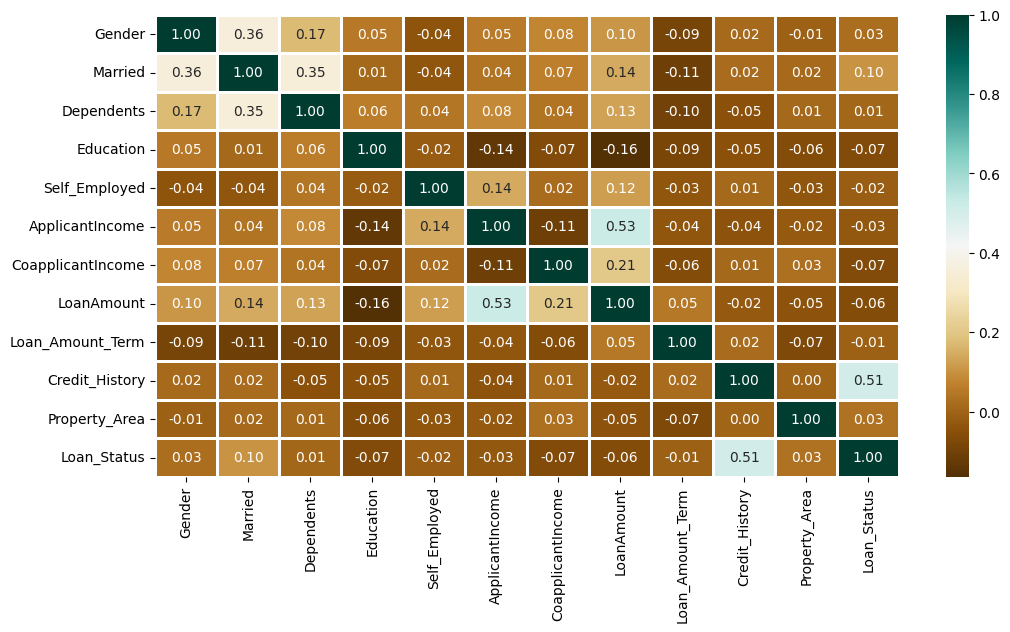

In [178]:
# correlation
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths = 2,annot = True)

Correlation between Loan Amount and ApplicantIncome.

Credit_History has a high impact on Loan_Status.

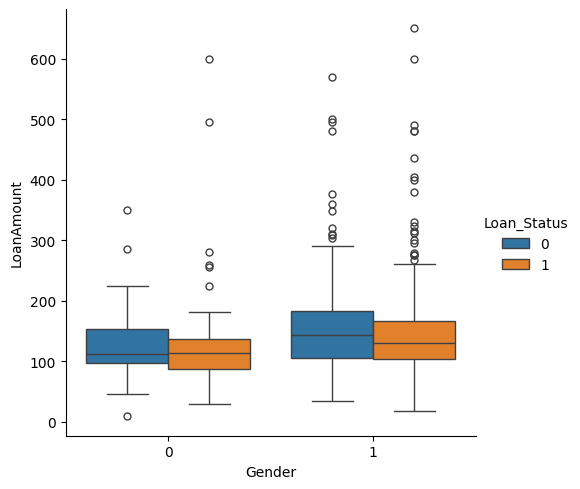

In [179]:
# visualize the plot for the Gender and LoanAmount of the applicant
sns.catplot(x="Gender", y="LoanAmount",
            hue="Loan_Status",
            kind="box",
            data=data)

In [180]:
#EDA

X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [181]:
# numerical colums
num_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# scale data to range [0, 1]
scaler = StandardScaler()
X[num_columns] = scaler.fit_transform(X[num_columns])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,0.088156,-0.547390,-0.000021,0.281358,1.0,2
1,1,1,1.0,0,0,-0.126269,-0.044475,-0.218210,0.281358,1.0,0
2,1,1,0.0,0,1,-0.394385,-0.547390,-0.969748,0.281358,1.0,2
3,1,1,0.0,1,0,-0.465013,0.238998,-0.315182,0.281358,1.0,2
4,1,0,0.0,0,0,0.113731,-0.547390,-0.060629,0.281358,1.0,2


In [182]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# define evaluation function
def evaluate_model(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cross_val = cross_val_score(model, X, y, cv=5)
  return accuracy, cross_val.mean()

In [184]:
# define models
models = {
    LogisticRegression(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
}

In [185]:
for model in models:
  accuracy, cross_val = evaluate_model(model)
  print(f"{model.__class__.__name__} Accuracy: {accuracy: .2f}, Cross-val-score: {cross_val: .2f}")

GradientBoostingClassifier Accuracy:  0.80, Cross-val-score:  0.77
DecisionTreeClassifier Accuracy:  0.70, Cross-val-score:  0.69
RandomForestClassifier Accuracy:  0.77, Cross-val-score:  0.79
LogisticRegression Accuracy:  0.81, Cross-val-score:  0.80
SVC Accuracy:  0.80, Cross-val-score:  0.79


Logistic Regression is giving the best accuracy.

In [186]:
# tunning the model - finding optimal values of hyperparameters to maximize model performance
def tune_model(model, param_grid):
  tuner = RandomizedSearchCV(model, param_grid, cv=5, n_iter=20, verbose=True, random_state=42)
  tuner.fit(X, y)
  print(f"Best params for {model.__class__.__name__}: {tuner.best_params_}")
  print(f"Best score for {model.__class__.__name__}: {tuner.best_score_: .2f}")
  return tuner.best_estimator_

In [187]:
log_reg_grid = {"C" : np.logspace(-4, 4, 20), "solver" :["liblinear"]}

In [188]:
tune_model(LogisticRegression(), log_reg_grid)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params for LogisticRegression: {'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}
Best score for LogisticRegression:  0.80


LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')